In [3]:
# importing all required libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
import os
from statistics import mode, mean, median

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Tranform
from scipy.stats import boxcox


In [4]:
# Read CSV File from Data Folder
filename = "cfs_pumf.txt"

# check if data is in current folder. If not, go one step back 
if "data" in os.listdir():
    print("Found data folder")
else:
    os.chdir("../")
    
try:
    dataset = pd.read_csv(f'{os.getcwd()}\\data\\{filename}') 
    print("Dataset is loaded")
except IOError:
    print(f'Could not find the data file {filename}')

Dataset is loaded


In [3]:
# Analyze first and last 10 rows
display("First 10 observations", dataset.head(10))
display("Last 10 observations", dataset.tail(10))

'First 10 observations'

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
1,2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
2,3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
3,4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
4,5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1
5,6,24,47900,24-47900,30,99999,30-99999,337,2,40,4,3716,1132,1942,2265,N,Y,C,N,21.9
6,7,19,99999,19-99999,19,99999,19-99999,337,3,26,5,43738,13501,16,22,N,N,N,N,310.5
7,8,6,41740,06-41740,6,99999,06-99999,4239,1,40,14,77,4,272,306,N,N,N,N,138.5
8,9,19,99999,19-99999,19,99999,19-99999,327,3,31,5,338,12826,10,15,N,N,N,N,2695.9
9,10,13,99999,13-99999,13,99999,13-99999,4237,2,34,5,145,22,21,28,N,N,N,N,489.1


'Last 10 observations'

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
4547651,4547652,39,99999,39-99999,39,99999,39-99999,323,2,29,4,247,62,20,29,N,N,N,N,129.5
4547652,4547653,51,40060,51-40060,37,450,37-450,321,3,26,5,3371,26250,158,173,N,N,N,N,280.8
4547653,4547654,19,99999,19-99999,17,99999,17-99999,4234,3,21,5,23587,4718,172,182,N,N,N,N,175.3
4547654,4547655,12,422,12-422,29,99999,29-99999,332,3,33,4,6804,1201,886,1216,N,N,N,N,63.0
4547655,4547656,48,206,48-206,48,206,48-206,4237,3,33,5,1820,38,3,5,N,N,N,N,1679.3
4547656,4547657,9,408,09-408,34,408,34-408,323,4,29,14,7988,133,122,152,N,N,N,N,260.6
4547657,4547658,39,178,39-178,28,99999,28-99999,311,3,05,4,50808,29887,561,683,Y,N,N,N,20.0
4547658,4547659,36,408,36-408,36,408,36-408,336,4,36,5,685,137,13,16,N,N,N,N,164.3
4547659,4547660,48,12420,48-12420,48,12420,48-12420,4233,3,33,5,915,1240,20,22,N,N,N,N,1059.9
4547660,4547661,30,99999,30-99999,30,99999,30-99999,325,1,23,4,22482,75952,12,12,N,N,N,N,66.1


In [4]:
# Setting Shipment Id as the index for the dataset
dataset.set_index('SHIPMT_ID',inplace=True)

In [6]:
# Removing ORIG_CFS_AREA and DEST_CFS_AREA as these columsn are derived from


In [37]:
# Analyze the datatype of all the variables and convert to appropriate one
dataset.dtypes.to_dict()

{'SHIPMT_ID': dtype('int64'),
 'ORIG_STATE': dtype('int64'),
 'ORIG_MA': dtype('int64'),
 'ORIG_CFS_AREA': dtype('O'),
 'DEST_STATE': dtype('int64'),
 'DEST_MA': dtype('int64'),
 'DEST_CFS_AREA': dtype('O'),
 'NAICS': dtype('int64'),
 'QUARTER': dtype('int64'),
 'SCTG': dtype('O'),
 'MODE': dtype('int64'),
 'SHIPMT_VALUE': dtype('int64'),
 'SHIPMT_WGHT': dtype('int64'),
 'SHIPMT_DIST_GC': dtype('int64'),
 'SHIPMT_DIST_ROUTED': dtype('int64'),
 'TEMP_CNTL_YN': dtype('O'),
 'EXPORT_YN': dtype('O'),
 'EXPORT_CNTRY': dtype('O'),
 'HAZMAT': dtype('O'),
 'WGT_FACTOR': dtype('float64')}

In [39]:
#Convert datatype of below variables to appropriate one
dataset.ORIG_STATE = dataset.ORIG_STATE.astype(str)
dataset.ORIG_MA = dataset.ORIG_MA.astype(str)
dataset.DEST_STATE = dataset.DEST_STATE.astype(str)
dataset.DEST_MA = dataset.DEST_MA.astype(str)
dataset.NAICS = dataset.NAICS.astype(str)
dataset.MODE = dataset.MODE.astype(str)

# Verify dataset again
dataset.dtypes.to_dict()

{'SHIPMT_ID': dtype('int64'),
 'ORIG_STATE': dtype('O'),
 'ORIG_MA': dtype('O'),
 'ORIG_CFS_AREA': dtype('O'),
 'DEST_STATE': dtype('O'),
 'DEST_MA': dtype('O'),
 'DEST_CFS_AREA': dtype('O'),
 'NAICS': dtype('O'),
 'QUARTER': dtype('int64'),
 'SCTG': dtype('O'),
 'MODE': dtype('O'),
 'SHIPMT_VALUE': dtype('int64'),
 'SHIPMT_WGHT': dtype('int64'),
 'SHIPMT_DIST_GC': dtype('int64'),
 'SHIPMT_DIST_ROUTED': dtype('int64'),
 'TEMP_CNTL_YN': dtype('O'),
 'EXPORT_YN': dtype('O'),
 'EXPORT_CNTRY': dtype('O'),
 'HAZMAT': dtype('O'),
 'WGT_FACTOR': dtype('float64')}

In [62]:
#Create and Analyze Cross table for categorical variables
for col in dataset.columns:
    if str(dataset[col].dtype) in ["str", "object"]:
        print(f'{col :30s} \n>>>>      {dataset[col].unique()}')

ORIG_STATE                    : 
>>>>      ['25' '42' '26' '20' '12' '24' '19' '6' '13' '55' '39' '33' '31' '54' '32'
 '9' '17' '37' '48' '18' '29' '49' '36' '27' '53' '47' '34' '5' '38' '56'
 '1' '51' '23' '45' '8' '35' '4' '21' '28' '41' '44' '2' '16' '40' '46'
 '22' '15' '30' '10' '50' '11' '0']
ORIG_MA                       : 
>>>>      ['148' '428' '220' '556' '99999' '47900' '41740' '184' '332' '408' '450'
 '172' '176' '348' '476' '482' '122' '104' '378' '370' '41700' '440' '400'
 '368' '420' '206' '268' '545' '312' '376' '40060' '142' '216' '25540'
 '38060' '350' '430' '266' '294' '178' '300' '488' '0' '472' '238' '416'
 '260' '288' '212' '273' '12940' '536' '500' '160' '464' '198' '45300'
 '538' '406' '46520' '12580' '258' '380' '422' '314' '12420' '496' '29340'
 '13140' '16700' '29700' '204']
ORIG_CFS_AREA                 : 
>>>>      ['25-148' '42-428' '26-220' '20-556' '12-99999' '24-47900' '19-99999'
 '06-41740' '13-99999' '55-99999' '39-184' '33-148' '31-99999' '26-99999'


In [7]:
# SCTG should be of type int64 but found as Object. Lets see why
SCTG_table = pd.crosstab(index=dataset["SCTG"], # Make a crosstab
                     columns="Count")               # Name the count column
SCTG_table

col_0,Count
SCTG,
00,691
01,2239
01-05,1458
02,24965
03,54265
04,45617
05,62355
06,53265
06-09,1267


In [ ]:
# Check the distribution


In [6]:
# 
# SCTG should be of type int64 but found as Object. Lets see why
SCTG_table = pd.crosstab(index=dataset["SCTG"], # Make a crosstab
                     columns="Count")               # Name the count column
SCTG_table

# After the analysis, We found that SCTG also contains SCTG_Group values. We need to noramilize them
# Team Decided to replace the SCTG_Group with Mode from the value between the values. For example:
# One Group "01-05" has values from has entities from 01 to 05. We calculated the mode and found 05 is appread most
# of the time and relaced the group with 05

SCTG_unique_values = dataset.groupby('SCTG')['SHIPMT_ID'].nunique()
SCTG_Group = [key for key in SCTG_unique_values.keys() if "-" in key]
for each_group in SCTG_Group:
    num_group = list(map(int, each_group.split("-")));
    range_group = list(range(num_group[0], num_group[1]+1))
    str_group = [str(key).zfill(2) for key in range_group]
    mode_SCTG_group = mode(dataset[dataset["SCTG"].isin(str_group)]["SCTG"])
    print(mode_SCTG_group, each_group)
    dataset["SCTG"].replace(to_replace=each_group, value=mode_SCTG_group, inplace=True)

EXPORT_CNTRY
C      54539
M      19367
N    4361940
O     111815
Name: SHIPMT_ID, dtype: int64

In [36]:
# As per the data dictonary, EXPORT_CNTRY should have only tree values, C = Canada, M = Mexico, O = Other, but found one
# more category. Need to analyze it.
EXPORT_CNTRY_table = pd.crosstab(index=dataset["EXPORT_CNTRY"], # Make a crosstab
                     columns="Count")               # Name the count column
EXPORT_CNTRY_table

col_0,Count
EXPORT_CNTRY,
C,54539
M,19367
N,4361940
O,111815


In [8]:
# Analyze the datatype of all the variables and convert to appropriate one
dataset.dtypes.to_dict()

{'SHIPMT_ID': dtype('int64'),
 'ORIG_STATE': dtype('O'),
 'ORIG_MA': dtype('O'),
 'ORIG_CFS_AREA': dtype('O'),
 'DEST_STATE': dtype('O'),
 'DEST_MA': dtype('O'),
 'DEST_CFS_AREA': dtype('O'),
 'NAICS': dtype('O'),
 'QUARTER': dtype('int64'),
 'SCTG': dtype('O'),
 'MODE': dtype('O'),
 'SHIPMT_VALUE': dtype('int64'),
 'SHIPMT_WGHT': dtype('int64'),
 'SHIPMT_DIST_GC': dtype('int64'),
 'SHIPMT_DIST_ROUTED': dtype('int64'),
 'TEMP_CNTL_YN': dtype('O'),
 'EXPORT_YN': dtype('O'),
 'EXPORT_CNTRY': dtype('O'),
 'HAZMAT': dtype('O'),
 'WGT_FACTOR': dtype('float64')}

In [ ]:
def splitDataset(dataset, splitRatio):    
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while(len(trainSet) < trainSize):
        index = random.randrage(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

05 01-05
07 06-09
12 10-14
19 15-19
24 20-24
30 25-30
34 31-34
35 35-38
43 39-99


In [5]:
my_tab = pd.crosstab(index=dataset["ORIG_CFS_AREA"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
ORIG_CFS_AREA,
00-00000,38
01-00000,240
01-142,28777
01-380,15289
01-99999,40083
...,...
54-99999,32003
55-00000,215
55-376,49327


{'SHIPMT_ID': dtype('int64'),
 'ORIG_STATE': dtype('O'),
 'ORIG_MA': dtype('O'),
 'ORIG_CFS_AREA': dtype('O'),
 'DEST_STATE': dtype('O'),
 'DEST_MA': dtype('O'),
 'DEST_CFS_AREA': dtype('O'),
 'NAICS': dtype('O'),
 'QUARTER': dtype('int64'),
 'SCTG': dtype('O'),
 'MODE': dtype('O'),
 'SHIPMT_VALUE': dtype('int64'),
 'SHIPMT_WGHT': dtype('int64'),
 'SHIPMT_DIST_GC': dtype('int64'),
 'SHIPMT_DIST_ROUTED': dtype('int64'),
 'TEMP_CNTL_YN': dtype('O'),
 'EXPORT_YN': dtype('O'),
 'EXPORT_CNTRY': dtype('O'),
 'HAZMAT': dtype('O'),
 'WGT_FACTOR': dtype('float64')}

D:\SoftwareInstalls\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mean                           >>> 15897.392289898531
Median                         >>> 814.0
Mode                           >>> 0    11
dtype: int64
Standard Deviation             >>> 942699.3366434927
Maxiumn                        >>> 521277800
Minimum                        >>> 1
Skewness                       >>> 480.42547739753337


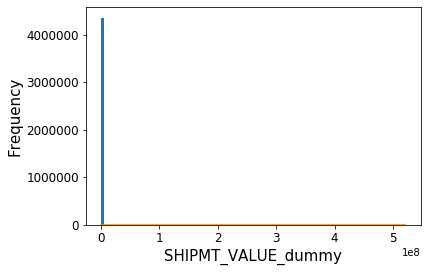

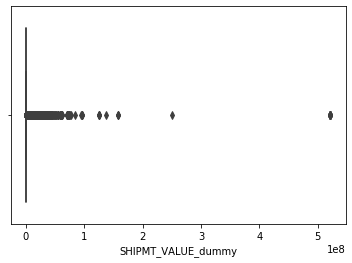

In [5]:
# Tranform data using boxcox method and verify
dataset_no_exported = dataset[dataset['EXPORT_YN'] == "N"]
dataset_no_exported['SHIPMT_VALUE_dummy'] = dataset_no_exported.SHIPMT_VALUE

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.mean()}')
print(f'{"Median":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.median()}')
print(f'{"Mode":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.std()}')
print(f'{"Maxiumn":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.max()}')
print(f'{"Minimum":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.min()}')
print(f'{"Skewness":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.skew()}')

# Check for distribution
dataset_no_exported['SHIPMT_VALUE_dummy'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset_no_exported['SHIPMT_VALUE_dummy'])
plt.show()

# Check for outliers
sns.boxplot(x=dataset_no_exported.SHIPMT_VALUE_dummy)

D:\SoftwareInstalls\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mean                           >>> 6.846136526374661
Median                         >>> 6.703188113240863
Mode                           >>> 0    2.484907
dtype: float64
Standard Deviation             >>> 2.336323705645125
Maxiumn                        >>> 20.07179366490681
Minimum                        >>> 0.6931471805599453
Skewness                       >>> 0.10633732391144797


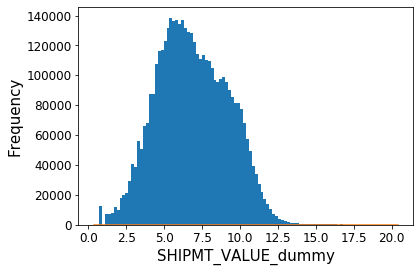

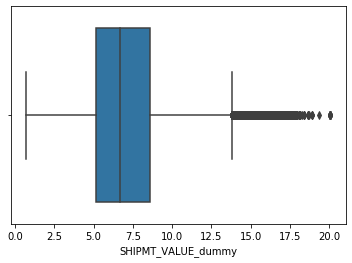

In [6]:
# Tranform data using boxcox method and verify
dataset_no_exported = dataset[dataset['EXPORT_YN'] == "N"]
dataset_no_exported['SHIPMT_VALUE_dummy'] = np.log(dataset_no_exported.SHIPMT_VALUE + 1)

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.mean()}')
print(f'{"Median":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.median()}')
print(f'{"Mode":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.std()}')
print(f'{"Maxiumn":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.max()}')
print(f'{"Minimum":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.min()}')
print(f'{"Skewness":30s} >>> {dataset_no_exported.SHIPMT_VALUE_dummy.skew()}')

# Check for distribution
dataset_no_exported['SHIPMT_VALUE_dummy'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset_no_exported['SHIPMT_VALUE_dummy'])
plt.show()

# Check for outliers
sns.boxplot(x=dataset_no_exported.SHIPMT_VALUE_dummy)

D:\SoftwareInstalls\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mean                           >>> 34226.85489896697
Median                         >>> 268.0
Mode                           >>> 0    1
dtype: int64
Standard Deviation             >>> 842075.8056681099
Maxiumn                        >>> 277029600
Minimum                        >>> 1
Skewness                       >>> 76.0878030096936


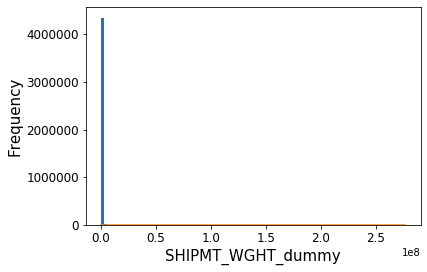

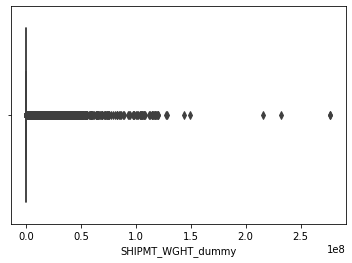

In [16]:
# Tranform data using boxcox method and verify
dataset_no_exported = dataset[dataset['EXPORT_YN'] == "N"]
dataset_no_exported["SHIPMT_WGHT_dummy"] = dataset_no_exported.SHIPMT_WGHT

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].mean()}')
print(f'{"Median":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].median()}')
print(f'{"Mode":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].max()}')
print(f'{"Minimum":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].min()}')
print(f'{"Skewness":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].skew()}')

# Check for distribution
dataset_no_exported["SHIPMT_WGHT_dummy"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset_no_exported["SHIPMT_WGHT_dummy"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset_no_exported["SHIPMT_WGHT_dummy"])

D:\SoftwareInstalls\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Mean                           >>> 5.7204916901022775
Median                         >>> 5.5909869805108565
Mode                           >>> 0    0.0
dtype: float64
Standard Deviation             >>> 3.5592517539633657
Maxiumn                        >>> 19.439634917648352
Minimum                        >>> 0.0
Skewness                       >>> 0.06386878737660391


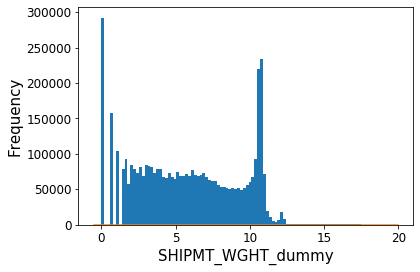

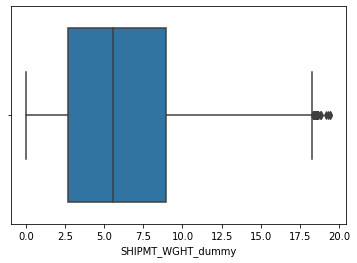

In [22]:
# Tranform data using boxcox method and verify
dataset_no_exported = dataset[dataset['EXPORT_YN'] == "N"]
dataset_no_exported["SHIPMT_WGHT_dummy"] = boxcox(dataset_no_exported.SHIPMT_WGHT, 0)

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].mean()}')
print(f'{"Median":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].median()}')
print(f'{"Mode":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].max()}')
print(f'{"Minimum":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].min()}')
print(f'{"Skewness":30s} >>> {dataset_no_exported["SHIPMT_WGHT_dummy"].skew()}')

# Check for distribution
dataset_no_exported["SHIPMT_WGHT_dummy"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset_no_exported["SHIPMT_WGHT_dummy"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset_no_exported["SHIPMT_WGHT_dummy"])

In [26]:
dataset_no_exported["SHIPMT_WGHT"].min

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,...,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR,SHIPMT_WGHT_dummy
10,11,55,99999,55-99999,36,464,36-464,333,2,35,...,482,1,536,834,N,N,N,N,194.9,0.0
51,52,34,428,34-428,20,312,20-312,5111,2,29,...,41,1,1045,1163,N,N,N,N,116.1,0.0
57,58,27,378,27-378,17,99999,17-99999,4239,3,40,...,450,1,270,325,N,N,N,N,73.3,0.0
90,91,42,408,42-408,42,408,42-408,324,3,19,...,1,1,3,3,N,N,N,N,41.6,0.0
99,100,39,184,39-184,53,500,53-500,332,1,40,...,18,1,2029,2424,N,N,N,N,1548.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547604,4547605,42,430,42-430,42,430,42-430,339,1,31,...,155,1,15,21,N,N,N,N,5196.1,0.0
4547613,4547614,8,216,08-216,6,348,06-348,313,1,30,...,145,1,813,1019,N,N,N,N,21.1,0.0
4547628,4547629,26,99999,26-99999,26,99999,26-99999,4236,1,35,...,16,1,5,5,N,N,N,N,2407.3,0.0
4547632,4547633,55,376,55-376,55,376,55-376,4237,3,33,...,15,1,9,12,N,N,N,N,14119.3,0.0
